## Esercitazione 6 - 26 Marzo 2024

$$
\begin{align}
&1 : e^{-x} - (x + 1) \\
&2:  \frac{\log(x + 3)}{\log(2)} - 2\\
&3: \sqrt{x} - \frac{x^2}{4} \\
\end{align}
$$

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

In [1]:
import numpy as np
import sympy as sym

import numpy.linalg as npl
import matplotlib.pyplot as plt
import math

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf


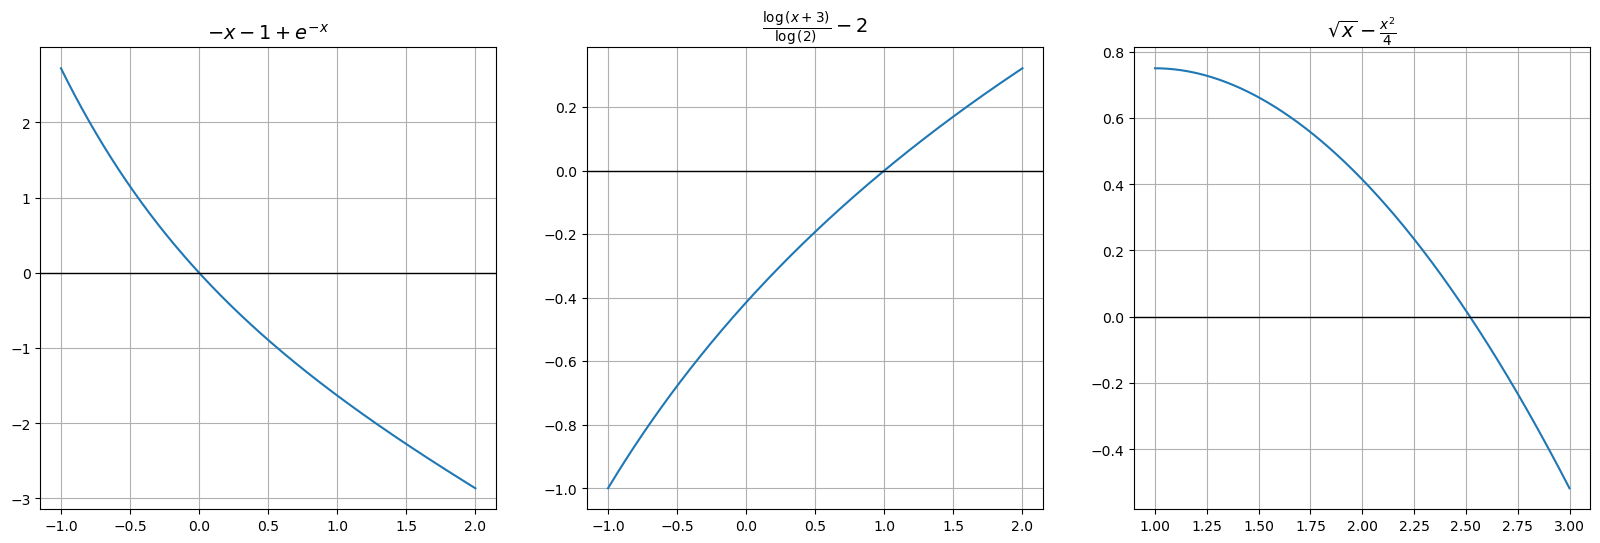

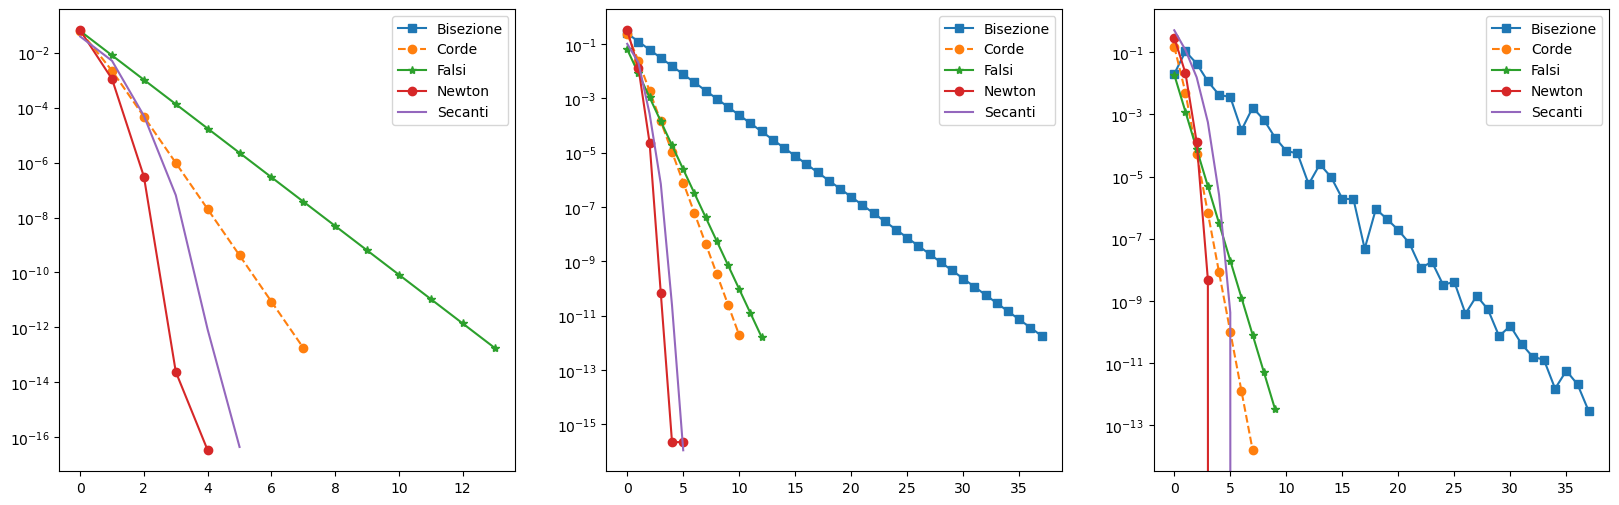

In [2]:
x = sym.symbols('x')

tolx = 1e-12
tolf = 1e-12
maxit = 1000

functions_sym = [sym.exp(-x) - (x + 1), sym.log(x + 3, 2) - 2, sym.sqrt(x)-(x**2)/4]
functions =     [sym.lambdify(x, f) for f in functions_sym]
der_sym =       [sym.diff(f, x) for f in functions_sym]
der =           [sym.lambdify(x, f) for f in der_sym]
intervals =     [[-1, 2], [-1, 2], [1, 3]]
ab =            [[-0.5, 0.5], [0, 1.5], [2.25, 2.75]]
x0s =           [-0.5, -0.5, 1.8]
xm1s=           [-0.3, 0.5, 1.5]
alfas =         [0, 1, 2**(4/3)]


fig, ax = plt.subplots(1, 3, figsize= (20, 6))


for i in range(3):
    xx = np.linspace(intervals[i][0], intervals[i][1], int(intervals[i][1] - intervals[i][0])*1000)
    yy = functions[i](xx)
    ax[i].grid(True)
    ax[i].plot(xx, yy)
    ax[i].set_title(r"$%s$" % sym.latex(functions_sym[i]), fontsize=14)
    ax[i].axhline(0, color='black', linewidth=1)

fig, ax = plt.subplots(1, 3, figsize= (20, 6))

for i in range(3):
    zero_bis, numit_bis, vec_sol_bis = sf.metodo_bisezione(functions[i], ab[i][0], ab[i][1], tolx, tolf)
    zero_falsi, numit_falsi, vec_sol_falsi = sf.falsi(functions[i], ab[i][0], ab[i][1],maxit, tolx, tolf)

    m = (functions[i](ab[i][1]) - functions[i](ab[i][0]))/(ab[i][1]-ab[i][0])
    zero_corde, numit_corde, vec_sol_corde = sf.corde(functions[i],m,x0s[i], tolx, tolf, maxit)
    zero_newton, numit_newton, vec_sol_newton = sf.newton(functions[i],der[i],x0s[i], tolx, tolf, maxit)
    zero_secanti, numit_secanti, vec_sol_secanti = sf.secanti(functions[i],xm1s[i],x0s[i], tolx, tolf, maxit)

    err_vec_bis = np.abs(np.array(vec_sol_bis)-alfas[i])
    err_vec_falsi = np.abs(np.array(vec_sol_falsi)-alfas[i])
    err_vec_corde = np.abs(np.array(vec_sol_corde)-alfas[i])
    err_vec_newton = np.abs(np.array(vec_sol_newton)-alfas[i])
    err_vec_secanti = np.abs(np.array(vec_sol_secanti)-alfas[i])

    ax[i].semilogy(range(numit_bis), err_vec_bis,'-s', label = 'Bisezione')
    ax[i].semilogy(range(numit_corde), err_vec_corde,'o--', label = 'Corde')
    ax[i].semilogy(range(numit_falsi), err_vec_falsi,'-*', label = 'Falsi')
    ax[i].semilogy(range(numit_newton), err_vec_newton,'-o', label = 'Newton')
    ax[i].semilogy(range(numit_secanti), err_vec_secanti, label = 'Secanti')
    ax[i].legend()




## Esercizio 2
Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

In [3]:
f_sym = x**3 + x**2 -33*x +63
fd_sym = sym.diff(f_sym, x)
f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)
x0 = 1

zero_nt, numit_nt, vec_sol_nt = sf.newton(f, fd,x0, tolx, tolf, maxit)
zero_nt_mod, numit_nt_mod, vec_sol_nt_mod = sf.newton_mod(f, fd,2, x0, tolx, tolf, maxit)

print("Ordine convergenza newton = ", sf.stima_ordine(vec_sol_nt, numit_nt))
print("Ordine convergenza newton MOD= ", sf.stima_ordine(vec_sol_nt_mod, numit_nt_mod))


Ordine convergenza newton =  1.021338197375246
Ordine convergenza newton MOD=  1.9965427710643453


## Esercizio 3
Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

In [4]:
f_sym = x**2 - 2
fd_sym = sym.diff(f_sym, x)
f = sym.lambdify(x, f_sym, np)
fd = sym.lambdify(x, fd_sym, np)

a,b = (1,2)
zero_bis, numit_bis, vec_sol_bis = sf.metodo_bisezione(f, a, b, tolx, tolf)
zero_nt, numit_nt, vec_sol_nt = sf.newton(f, fd, x0, tolx, tolf, maxit)

print("Radice di 2 con bisezione = ", zero_bis)
print("Radice di 2 con newton = ", zero_nt)

Radice di 2 con bisezione =  1.4142135623733338
Radice di 2 con newton =  1.414213562373095


## Esercizio 4

Risolvere i seguenti tre sistemi non lineari:


$$
\begin{align}

&1 = 
\begin{cases}
2x_{0} - \cos(x_{1}) = 0 \\
\sin(x_{0})+2x_{1} = 0 
\end{cases} \\  
&2 = 
\begin{cases}
x_0^2+x_1^2-9=0 \\
x_0^2+2x_1-2=0
\end{cases} \\
&3 = 
\begin{cases}
4x_0^2+x_1^2=4 \\

x_0+x_1= \sin(x_0-x_1)
\end{cases} \\
\end{align}
$$


Per determinare l'iterato iniziale $x_0$ , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici $z = f(x_1 ,x_2 )$ e $z = h(x_1 , x_2 )$ e 
definire come iterato iniziale un vettore $x_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

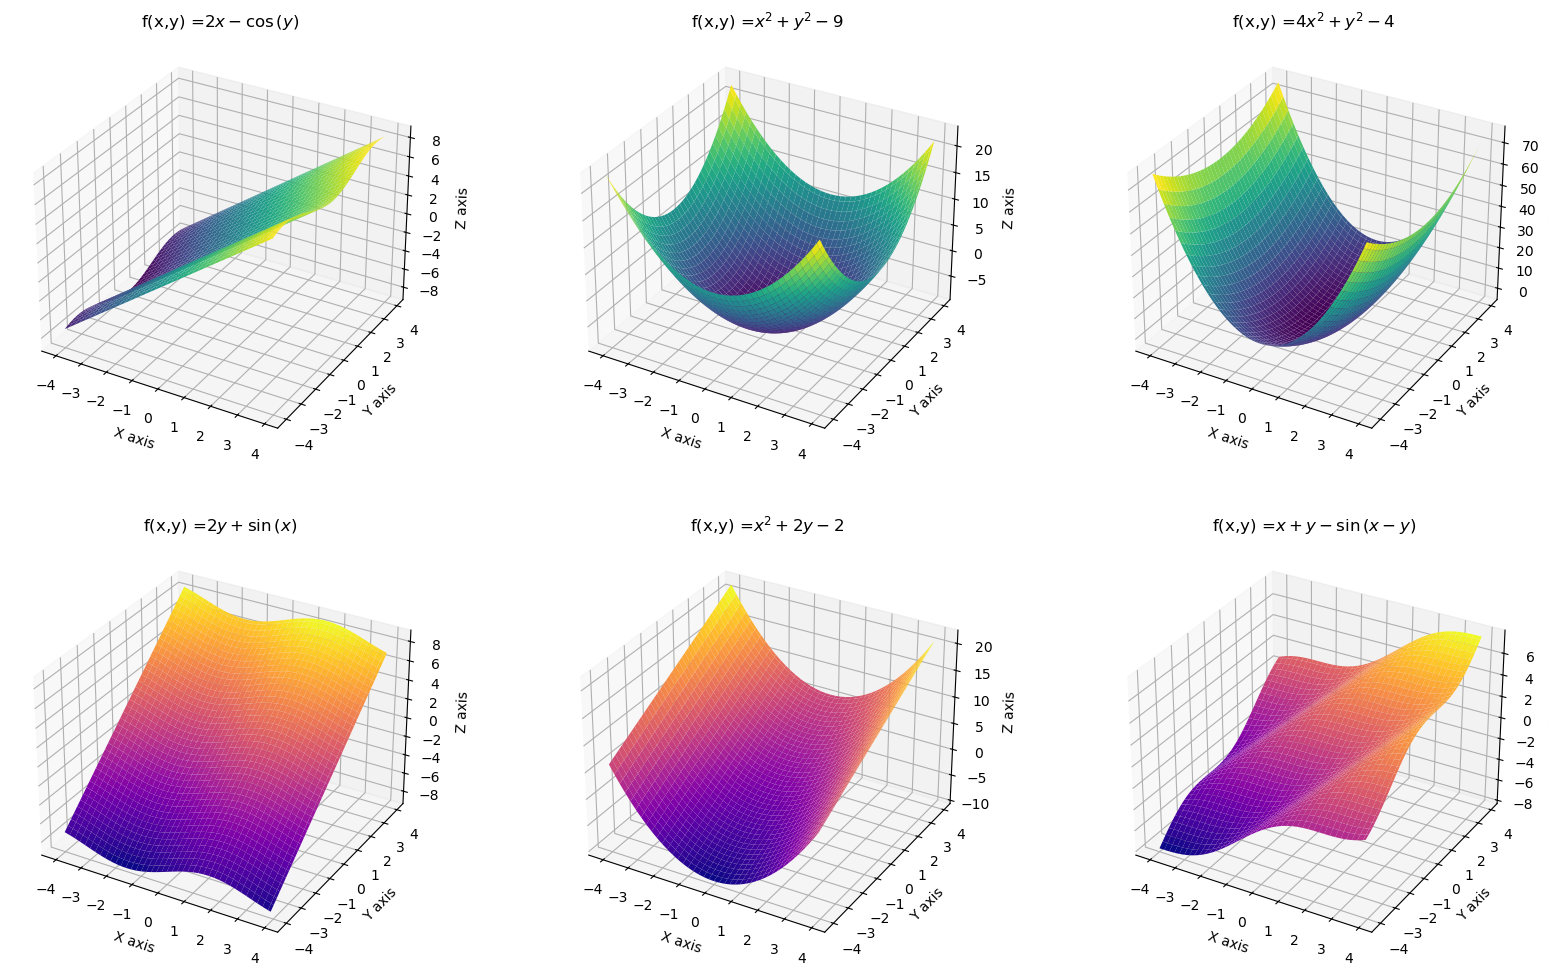

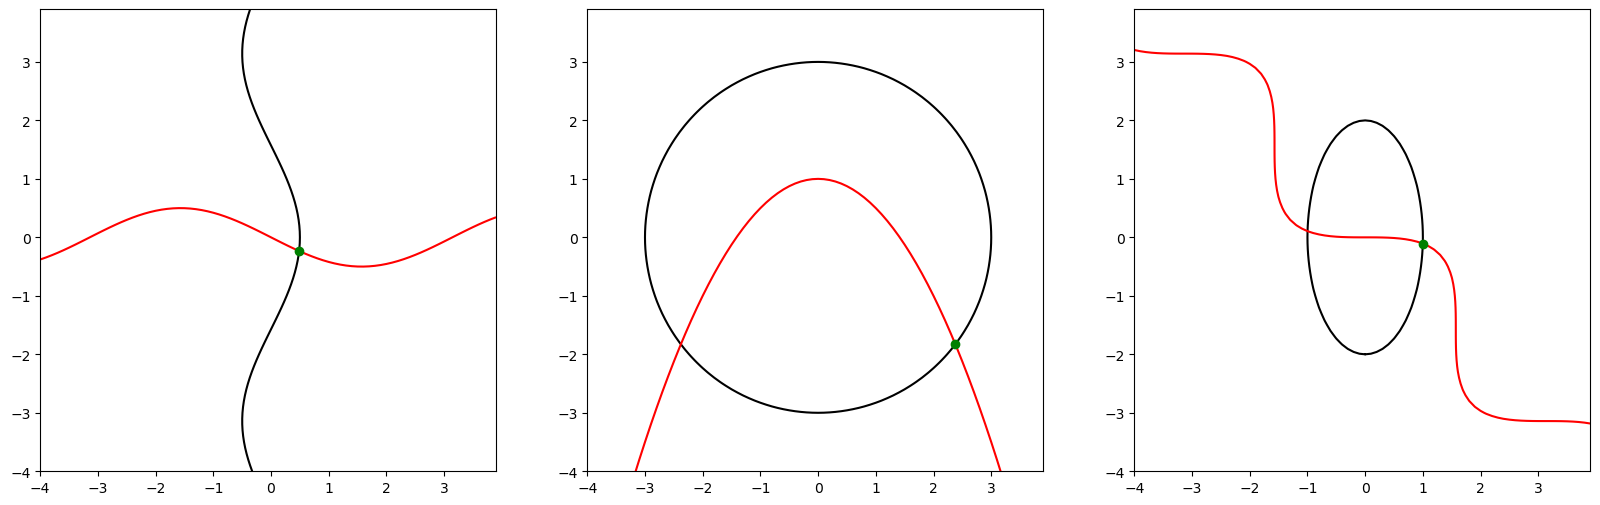

In [22]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = sym.symbols('x y')


xx = np.arange(-4.0, 4.0, 0.1)
yy = np.arange(-4.0, 4.0, 0.1)
X,Y = np.meshgrid(xx, yy)

A1 = sym.Matrix([2*x[0]-sym.cos(x[1]), 
                sym.sin(x[0]) + 2*x[1]])

A2 = sym.Matrix([x[0]**2 +x[1]**2 -9,
                x[0]**2 +2*x[1] -2])

A3 = sym.Matrix([4*x[0]**2 +x[1]**2 -4,
                x[0] + x[1] - sym.sin(x[0] - x[1])])

matrices = [A1, A2, A3]

fig, ax = plt.subplots(2, 3, figsize=(20,12),subplot_kw={'projection': '3d'})

fig2, bx = plt.subplots(1, 3, figsize=(20,6))

x0s = np.array([[0, 0], [3, -2], [1,0]])
Fs =    []
jacs =  []
Z1s =   []
Z2s =   []
for i in range(len(matrices)):
    fun1 = matrices[i][0]
    fun2 = matrices[i][1]

    fun1 = sym.lambdify(x, fun1, np)
    fun2 = sym.lambdify(x, fun2, np)


    jac_sym = matrices[i].jacobian(x)
    jac_not_np = sym.lambdify((x[0], x[1]), jac_sym, np)
    jac = lambda x : np.array(jac_not_np(x[0], x[1]))
    jacs.append(jac)


    F_not_np = sym.lambdify((x[0], x[1]), matrices[i], np)
    F = lambda x : np.array(F_not_np(x[0], x[1])).flatten()
    Fs.append(F)
    Z1, Z2 = fun1(X,Y), fun2(X,Y)
    Z1s.append(Z1)
    Z2s.append(Z2)


    ax[0][i].set_title(rf"f(x,y) =${sym.latex(matrices[i][0])}$")
    ax[0][i].plot_surface(X, Y, Z1, cmap='viridis')
    ax[1][i].set_title(rf"f(x,y) =${sym.latex(matrices[i][1])}$")
    ax[1][i].plot_surface(X, Y, Z2, cmap='plasma')
    ax[0][i].set_xlabel('X axis')
    ax[0][i].set_ylabel('Y axis')
    ax[0][i].set_zlabel('Z axis')

    ax[1][i].set_xlabel('X axis')
    ax[1][i].set_ylabel('Y axis')
    ax[1][i].set_zlabel('Z axis')

    bx[i].contour(X,Y,Z1, levels = [0], colors= "black")
    bx[i].contour(X,Y,Z2, levels = [0], colors= "red")

    sol_nt, numit_nt, err_vec_nt = sf.my_newtonSys(F, jac, x0s[i], tolx, tolf, maxit) #<-

    bx[i].plot(sol_nt[0], sol_nt[1], 'go') #<-